# 第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(
    './data/nlp_100_60_69/GoogleNews-vectors-negative300.bin.gz',
    binary=True
)

In [2]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [3]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [4]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [7]:
vec = model['Spain'] - model['Madrid'] + model['Athens']
vec

array([ 3.93310547e-01, -5.07812500e-02, -4.14123535e-02, -1.41113281e-01,
        2.69721985e-01, -1.47949219e-01,  9.81445312e-02, -2.02636719e-02,
       -3.56689453e-01,  2.82226562e-01, -2.39257812e-01, -2.96875000e-01,
        2.47070312e-01, -1.05895996e-01, -6.29882812e-02,  1.09741211e-01,
       -3.06152344e-01,  4.29687500e-02,  4.58984375e-02,  1.47460938e-01,
        2.30468750e-01, -4.39453125e-03,  3.75488281e-01, -2.88574219e-01,
       -6.35070801e-02,  3.73535156e-02, -1.76757812e-01,  3.22265625e-02,
       -4.26269531e-01,  3.53027344e-01,  1.06445312e-01, -5.10253906e-02,
       -1.83715820e-02, -1.26953125e-02,  9.79003906e-02, -1.64428711e-01,
       -2.62695312e-01, -3.62548828e-01,  1.92138672e-01,  4.11376953e-02,
        8.95996094e-02, -7.40966797e-02,  2.79785156e-01,  7.42187500e-02,
        4.74853516e-02,  1.19628906e-01, -6.90734863e-01, -1.65405273e-02,
       -8.28247070e-02, -1.23046875e-01, -2.26440430e-01,  3.33007812e-01,
       -2.39624023e-01,  

In [8]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [9]:
!curl -o ./data/nlp_100_60_69/questions-words.txt --create-dirs http://download.tensorflow.org/data/questions-words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  589k  100  589k    0     0   512k      0  0:00:01  0:00:01 --:--:--  512k


In [10]:
!head -n 10 ./data/nlp_100_60_69/questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [12]:
from tqdm import tqdm

In [13]:
with open('./data/nlp_100_60_69/questions-words.txt', 'r') as f:
    text = f.read().split('\n')
    f.close()
analogies = []
for line in tqdm(text[:100]):
    line = line.split()
    if line[0] == ':':
        category = line[1]
    else:
        word, sim = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
        analogy = {
            'category': category,
            'line': line,
            'word': word,
            'sim': sim,
            'answer': line[3]
        }
        analogies.append(analogy)

100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


In [14]:
analogies

[{'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Baghdad', 'Iraq'],
  'word': 'Iraqi',
  'sim': 0.6351870894432068,
  'answer': 'Iraq'},
 {'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Bangkok', 'Thailand'],
  'word': 'Thailand',
  'sim': 0.7137669324874878,
  'answer': 'Thailand'},
 {'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Beijing', 'China'],
  'word': 'China',
  'sim': 0.7235777974128723,
  'answer': 'China'},
 {'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Berlin', 'Germany'],
  'word': 'Germany',
  'sim': 0.6734622120857239,
  'answer': 'Germany'},
 {'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Bern', 'Switzerland'],
  'word': 'Switzerland',
  'sim': 0.4919748306274414,
  'answer': 'Switzerland'},
 {'category': 'capital-common-countries',
  'line': ['Athens', 'Greece', 'Cairo', 'Egypt'],
  'word': 'Egypt',
  'sim': 0.7527809739112854,
  'answer': '

## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [15]:
syn, syn_sum, sem, sem_sum = 0, 0, 0, 0
for analogy in analogies:
    if analogy['category'].startswith('gram'):
        syn_sum+=1
        if analogy['word'] == analogy['answer']:
            syn+=1
    else:
        sem_sum+=1
        if analogy['word'] == analogy['answer']:
            sem+=1

print(f'意味的アナロジー: {sem/sem_sum}')
# print(f'文法的アナロジー: {syn/syn_sum}')

意味的アナロジー: 0.8080808080808081


## 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [16]:
!curl -o ./data/nlp_100_60_69/wordsim353.zip --create-dirs http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23257  100 23257    0     0  15473      0  0:00:01  0:00:01 --:--:-- 15473


In [17]:
!unzip ./data/nlp_100_60_69/wordsim353.zip -d ./data/nlp_100_60_69/

Archive:  ./data/nlp_100_60_69/wordsim353.zip
  inflating: ./data/nlp_100_60_69/combined.csv  
  inflating: ./data/nlp_100_60_69/set1.csv  
  inflating: ./data/nlp_100_60_69/set2.csv  
  inflating: ./data/nlp_100_60_69/combined.tab  
  inflating: ./data/nlp_100_60_69/set1.tab  
  inflating: ./data/nlp_100_60_69/set2.tab  
  inflating: ./data/nlp_100_60_69/instructions.txt  


In [20]:
!head -n 10 ./data/nlp_100_60_69/combined.csv

In [58]:
with open('./data/nlp_100_60_69/combined.csv') as f:
    next(f)
    model_sim, human_sim = [], []
    for line in f:
        line = line.split(',')
        model_sim.append(model.similarity(line[0], line[1]))
        human_sim.append(line[2])
    f.close()

In [59]:
import numpy as np
from scipy.stats import spearmanr

correlation, pvalue = spearmanr(np.array(human_sim), np.array(model_sim))
print(correlation)

0.684922619908447


## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [74]:
with open('./data/nlp_100_60_69/questions-words.txt') as f:
    text = f.read().split('\n')
    countries = []
    for line in text:
        line = line.split()
        if len(line) > 0 and line[0] == ':':
            if line[1] == 'capital-common-countries' or line[1] == 'capital-world':
                flg = True
                continue
            else:
                flg = False
        if flg:
            countries.append(line[2])
            countries.append(line[3])
    f.close()
countries

['Baghdad',
 'Iraq',
 'Bangkok',
 'Thailand',
 'Beijing',
 'China',
 'Berlin',
 'Germany',
 'Bern',
 'Switzerland',
 'Cairo',
 'Egypt',
 'Canberra',
 'Australia',
 'Hanoi',
 'Vietnam',
 'Havana',
 'Cuba',
 'Helsinki',
 'Finland',
 'Islamabad',
 'Pakistan',
 'Kabul',
 'Afghanistan',
 'London',
 'England',
 'Madrid',
 'Spain',
 'Moscow',
 'Russia',
 'Oslo',
 'Norway',
 'Ottawa',
 'Canada',
 'Paris',
 'France',
 'Rome',
 'Italy',
 'Stockholm',
 'Sweden',
 'Tehran',
 'Iran',
 'Tokyo',
 'Japan',
 'Bangkok',
 'Thailand',
 'Beijing',
 'China',
 'Berlin',
 'Germany',
 'Bern',
 'Switzerland',
 'Cairo',
 'Egypt',
 'Canberra',
 'Australia',
 'Hanoi',
 'Vietnam',
 'Havana',
 'Cuba',
 'Helsinki',
 'Finland',
 'Islamabad',
 'Pakistan',
 'Kabul',
 'Afghanistan',
 'London',
 'England',
 'Madrid',
 'Spain',
 'Moscow',
 'Russia',
 'Oslo',
 'Norway',
 'Ottawa',
 'Canada',
 'Paris',
 'France',
 'Rome',
 'Italy',
 'Stockholm',
 'Sweden',
 'Tehran',
 'Iran',
 'Tokyo',
 'Japan',
 'Athens',
 'Greece',
 'Beiji

In [78]:
countries = list(set(countries))
countries_vec = [model[country] for country in countries]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

KMeans(n_clusters=5)

In [82]:
kmeans.labels_

array([2, 4, 4, 2, 4, 1, 3, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3, 3, 1, 0, 0, 0,
       0, 1, 0, 3, 2, 1, 2, 0, 1, 1, 3, 1, 1, 1, 0, 0, 0, 4, 4, 4, 1, 3,
       0, 0, 1, 1, 1, 3, 0, 4, 1, 0, 1, 3, 1, 0, 2, 1, 4, 1, 2, 2, 2, 1,
       0, 4, 2, 0, 3, 1, 3, 2, 3, 4, 4, 2, 1, 2, 3, 0, 3, 0, 2, 4, 4, 4,
       3, 3, 0, 1, 4, 4, 3, 1, 0, 1, 1, 1, 1, 4, 1, 0, 2, 1, 1, 0, 1, 1,
       3, 1, 1, 3, 4, 0, 1, 4, 2, 1, 2, 4, 0, 0, 0, 1, 4, 1, 2, 3, 3, 4,
       0, 0, 1, 1, 4, 3, 4, 4, 3, 1, 0, 1, 4, 1, 1, 4, 4, 3, 0, 1, 0, 3,
       4, 4, 1, 1, 0, 4, 1, 1, 2, 1, 4, 1, 0, 0, 4, 3, 3, 3, 4, 4, 2, 0,
       0, 4, 1, 0, 3, 0, 0, 4, 1, 4, 0, 4, 4, 0, 0, 1, 4, 0, 1, 3, 4, 1,
       1, 1, 0, 3, 1, 0, 0, 4, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0,
       4, 4, 4, 4, 2, 2, 0, 0, 1, 0, 0, 1], dtype=int32)

In [84]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster: ', i)
    print(', '.join([countries[i] for i in cluster]))

cluster:  0
Stockholm, Jakarta, Havana, Lisbon, Funafuti, Tripoli, Madrid, Canberra, Nassau, Kabul, Dhaka, Kingston, Montevideo, Roseau, Thimphu, Quito, Kathmandu, Islamabad, Ottawa, Baghdad, Beijing, Athens, London, Tehran, Tunis, Manila, Cairo, Doha, Vienna, Berlin, Hanoi, Tokyo, Muscat, Valletta, Dublin, Brussels, Caracas, Taipei, Jordan, Amman, Oslo, Georgetown, Bangkok, Manama, Lima, Damascus, Bern, Managua, Rabat, Nicosia, Santiago, Nuuk, Vientiane, Beirut, Rome, Copenhagen, Paris
cluster:  1
Angola, Laos, Tajikistan, Uzbekistan, Madagascar, Turkmenistan, Kyrgyzstan, Indonesia, Cuba, Sudan, Chile, Botswana, Jamaica, Bahrain, Liberia, Guinea, Thailand, Uganda, Eritrea, Fiji, Afghanistan, Nigeria, Zambia, Gambia, Egypt, Algeria, Peru, Ghana, Guyana, Philippines, Taiwan, Libya, Qatar, Bahamas, Gabon, Mauritania, Burundi, Bangladesh, Iran, Venezuela, Pakistan, Bhutan, Dominica, Morocco, Kenya, Lebanon, Tuvalu, Senegal, Mozambique, Mali, Somalia, Suriname, Honduras, China, Namibia, Vi

## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

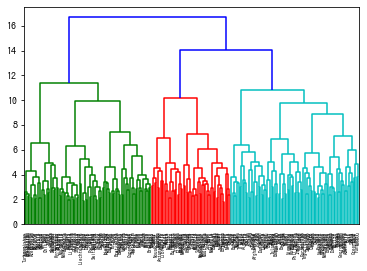

In [88]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(countries_vec, method='ward')
dendrogram(z, labels=countries)
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．